**Examen de Certificación – Intento 3**

Fundamentos de Data Science

Analizando la Rotación de Clientes en Telecomunicaciones

**1. Limpieza de datos con Python:**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


-Identificar y solucionar cualquier valor duplicado.

In [2]:
print(df.shape)
df=df.drop_duplicates()
print(df.shape) #No hay duplicados

(7043, 21)
(7043, 21)


- Asegurarse de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.
- Identificar y solucionar cualquier valor faltante en el dataset. Rellenar los valores faltantes con un marcador adecuado para el tipo de dato.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
diccionario = {
    'customerID': 'string',
    'gender': 'string',
    'SeniorCitizen': 'int64',      # Es un indicador binario, puede ser tratado como entero
    'Partner': 'string',           # Texto, ya que son categorías como "Yes" y "No"
    'Dependents': 'string',        # Texto, ya que son categorías como "Yes" y "No"
    'tenure': 'int64',             # Parece indicar un número entero de meses o años de servicio
    'PhoneService': 'string',      # Texto, con categorías "Yes", "No", o "No phone service"
    'MultipleLines': 'string',     # Texto, con categorías "Yes", "No", o "No phone service"
    'InternetService': 'string',   # Texto, con categorías como "DSL", "Fiber optic", o "No"
    'OnlineSecurity': 'string',    # Texto, con categorías como "Yes" y "No"
    'OnlineBackup': 'string',      # Texto, con categorías como "Yes" y "No"
    'DeviceProtection': 'string',  # Texto, con categorías como "Yes" y "No"
    'TechSupport': 'string',       # Texto, con categorías como "Yes" y "No"
    'StreamingTV': 'string',       # Texto, con categorías como "Yes" y "No"
    'StreamingMovies': 'string',   # Texto, con categorías como "Yes" y "No"
    'Contract': 'string',          # Texto, con categorías como "Month-to-month", etc.
    'PaperlessBilling': 'string',  # Texto, con categorías "Yes" y "No"
    'PaymentMethod': 'string',     # Texto, con varias opciones de métodos de pago
    'MonthlyCharges': 'float64',   # Parece un valor decimal, adecuado para float
    'TotalCharges': 'float64',     # También parece un valor decimal
    'Churn': 'string'              # Texto, con categorías "Yes" y "No"
}
for columna, tipo in diccionario.items():
    if columna in df.columns:
        try:
            df[columna] = df[columna].astype(tipo)
        except ValueError:
            print(f"Advertencia: No se pudo convertir la columna '{columna}' a {tipo} debido a datos inconsistentes.")
            # Opcionalmente podrías usar `pd.to_numeric` o `pd.to_datetime` según el tipo, con `errors='coerce'`

print(f"Este es el nuevo esquema de tipos de datos:\n{df.dtypes}")
df[pd.to_numeric(df['TotalCharges'], errors='coerce').isnull()]
print(df.dtypes)


Advertencia: No se pudo convertir la columna 'TotalCharges' a float64 debido a datos inconsistentes.
Este es el nuevo esquema de tipos de datos:
customerID          string[python]
gender              string[python]
SeniorCitizen                int64
Partner             string[python]
Dependents          string[python]
tenure                       int64
PhoneService        string[python]
MultipleLines       string[python]
InternetService     string[python]
OnlineSecurity      string[python]
OnlineBackup        string[python]
DeviceProtection    string[python]
TechSupport         string[python]
StreamingTV         string[python]
StreamingMovies     string[python]
Contract            string[python]
PaperlessBilling    string[python]
PaymentMethod       string[python]
MonthlyCharges             float64
TotalCharges                object
Churn               string[python]
dtype: object
customerID          string[python]
gender              string[python]
SeniorCitizen                int64
P

In [5]:
df.iloc[488]


customerID                         4472-LVYGI
gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [6]:
df.iloc[488]['TotalCharges']

' '

In [7]:
df = df[df['TotalCharges']!= ' ']

In [8]:
df.shape

(7032, 21)

In [9]:
df['TotalCharges'] = df['TotalCharges'].astype(float)


In [10]:
df.dtypes

customerID          string[python]
gender              string[python]
SeniorCitizen                int64
Partner             string[python]
Dependents          string[python]
tenure                       int64
PhoneService        string[python]
MultipleLines       string[python]
InternetService     string[python]
OnlineSecurity      string[python]
OnlineBackup        string[python]
DeviceProtection    string[python]
TechSupport         string[python]
StreamingTV         string[python]
StreamingMovies     string[python]
Contract            string[python]
PaperlessBilling    string[python]
PaymentMethod       string[python]
MonthlyCharges             float64
TotalCharges               float64
Churn               string[python]
dtype: object

In [11]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

- Identificar y solucionar cualquier inconsistencia en los valores categóricos (ejemplo: cat, Cat, cats).
- Identificar y solucionar cualquier punto de dato inapropiado o inusual (ejemplo: la edad no puede ser 325).

In [12]:
# Obtener los nombres de las columnas del DataFrame
columnas_a_verificar = df.columns.tolist()  # Convertir a lista

for columna in columnas_a_verificar:
    # Extraemos los diferentes tipos de entradas de la columna
    unique_values = df[columna].unique().tolist()
    
    # Pongamos todos en minúsculas y sin espacios
    unique_values = [str(value).lower().replace(" ", "") for value in unique_values]
    
    # Verificar si hay elementos repetidos
    repetido = len(unique_values) > len(set(unique_values))
    
    # Imprimir el resultado
    print(f"¿Hay elementos repetidos en la columna '{columna}'? {repetido}") #Si es que se repite algun dato es porque hay alguno que está mal escrito

¿Hay elementos repetidos en la columna 'customerID'? False
¿Hay elementos repetidos en la columna 'gender'? False
¿Hay elementos repetidos en la columna 'SeniorCitizen'? False
¿Hay elementos repetidos en la columna 'Partner'? False
¿Hay elementos repetidos en la columna 'Dependents'? False
¿Hay elementos repetidos en la columna 'tenure'? False
¿Hay elementos repetidos en la columna 'PhoneService'? False
¿Hay elementos repetidos en la columna 'MultipleLines'? False
¿Hay elementos repetidos en la columna 'InternetService'? False
¿Hay elementos repetidos en la columna 'OnlineSecurity'? False
¿Hay elementos repetidos en la columna 'OnlineBackup'? False
¿Hay elementos repetidos en la columna 'DeviceProtection'? False
¿Hay elementos repetidos en la columna 'TechSupport'? False
¿Hay elementos repetidos en la columna 'StreamingTV'? False
¿Hay elementos repetidos en la columna 'StreamingMovies'? False
¿Hay elementos repetidos en la columna 'Contract'? False
¿Hay elementos repetidos en la column

In [13]:
malgenero=False
malgenero = ((df['gender'] != "Male") & (df['gender'] != "Female")).any()
print(f"¿Hay años anómalos? {malgenero}")

¿Hay años anómalos? False


**2. Exploración de datos con Python:**

- Crear dos tipos diferentes de visualizaciones exploratorias univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código

In [16]:
fig = px.histogram(df, x='InternetService', nbins=10, title='Histograma de servicios')
# Mostrar la figura
fig.show()

# Crear el boxplot
fig = px.box(df, x='InternetService', y='TotalCharges', title='Boxplot de Salarios por Nivel de Experiencia')
# Mostrar la figura
fig.show()

- Crear dos tipos diferentes de visualizaciones exploratorias multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

In [19]:
df_melted = df.melt(id_vars=['gender'], 
                    value_vars=['PhoneService', 'MultipleLines', 'InternetService', 
                                'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                                'TechSupport', 'StreamingTV', 'StreamingMovies'],
                    var_name='Service', 
                    value_name='Contracted')

# Filtra solo las filas donde el servicio ha sido contratado
df_filtered = df_melted[df_melted['Contracted'] == 'Yes']

# Cuenta cuántos de cada servicio fueron contratados por cada género
service_count = df_filtered.groupby(['gender', 'Service']).size().reset_index(name='count')

# Crea el gráfico de barras apiladas
fig = px.bar(service_count, x='Service', y='count', color='gender',
             title='Servicios Contratados según Género',
             labels={'Service': 'Servicio', 'count': 'Cantidad'},
             barmode='group')

fig.show()


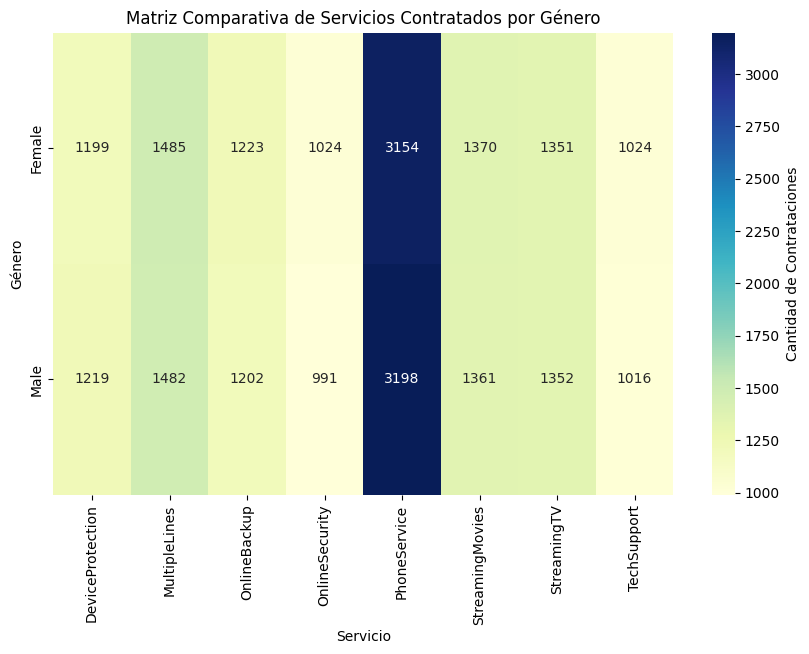

In [21]:
# Paso 2: Filtrar solo las filas donde el servicio fue contratado
df_filtered = df_melted[df_melted['Contracted'] == 'Yes']

# Paso 3: Crear una tabla de frecuencia
service_pivot = df_filtered.pivot_table(index='gender', columns='Service', aggfunc='size', fill_value=0)

# Paso 4: Crear el heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(service_pivot, annot=True, fmt="d", cmap="YlGnBu", cbar_kws={'label': 'Cantidad de Contrataciones'})
plt.title('Matriz Comparativa de Servicios Contratados por Género')
plt.xlabel('Servicio')
plt.ylabel('Género')
plt.show()

In [22]:
# Calcular estadísticas por género para MonthlyCharges y TotalCharges
gasto_por_genero = df.groupby('gender')[['MonthlyCharges', 'TotalCharges']].agg(['mean', 'median', 'sum']).reset_index()

# Mostrar el DataFrame con las estadísticas
print(gasto_por_genero)

   gender MonthlyCharges                  TotalCharges                    
                    mean median       sum         mean   median        sum
0  Female      65.216652  70.65  227149.6  2283.190985  1387.35  7952354.2
1    Male      64.387546  70.10  228511.4  2283.407861  1404.65  8103814.5


In [24]:
df_filtered = df[df['InternetService'] != 'No']

# Calcular el promedio de MonthlyCharges por tipo de InternetService
internet_service_cost = df_filtered.groupby('InternetService')['MonthlyCharges'].mean().reset_index()

# Crear el gráfico de barras
fig = px.bar(internet_service_cost, x='InternetService', y='MonthlyCharges',
             title='Costo Promedio Mensual por Tipo de Servicio de Internet (Sin "No")',
             labels={'InternetService': 'Tipo de Servicio de Internet', 'MonthlyCharges': 'Costo Promedio Mensual'},
             color='InternetService')

fig.show()

En las primeras graficas podemos observar la cantidad de ventas por servicio ofrecido viendo una ventaja sobre la fibra optico, aun si es que en la ultima grafica observamos que el precio es mayor
En las ultimas graficas observamos que estan casi empatados los clientes con respecto a los generos, habiendo una mayoria muy pequeña de mujeres 